<br><br>
<font size='6'><b>Logistic Regression</b></font><br><br>

<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Logistic-Regression-using-Scikit-Learn" data-toc-modified-id="1.-Logistic-Regression-using-Scikit-Learn-1">1. Logistic Regression using Scikit-Learn</a></span></li></ul></div>

- Benefit of mapping via the logistic function

 - monotonic: same or similar optimziation solution
 - continuous and differentiable: good for gradient descent optimization
 - probability or confidence: can be considered as probability
 
 $$P\left(y = +1 \mid x\,;\omega\right) = \frac{1}{1+e^{-\omega^T x}} \;\; \in \; [0,1]$$
 <br>
 
 - Often we do note care about predicting the label $y$ 

 - Rather, we want to predict the label probabilities $P\left(y \mid x\,;\omega\right)$
    - the probability that the label is $+1$
    $$P\left(y = +1 \mid x\,;\omega\right)$$
    - the probability that the label is $0$
    $$P\left(y = 0 \mid x\,;\omega\right) =  1 - P\left(y = +1 \mid x\,;\omega\right)$$
    


- Goal: we need to fit $\omega$ to our data

For a single data point $(x,y)$ with parameters $\omega$
<br>

$$
\begin{align*}
P\left(y = +1 \mid x\,;\omega\right) &= h_{\omega}(x) = \sigma \left(\omega^T x \right)\\
P\left(y = 0 \mid x\,;\omega\right) &=  1 - h_{\omega}(x) = 1- \sigma \left(\omega^T x \right)
\end{align*}
$$

It can be written as 

$$P\left(y \mid x\,;\omega\right) = \left(h_{\omega}(x) \right)^y \left(1 - h_{\omega}(x)\right)^{1-y}$$

<br>
For $m$ training data points, the likelihood function of the parameters:
<br><br>

$$
\begin{align*}
\mathscr{L}(\omega) &= P\left(y^{(1)}, \cdots, y^{(m)} \mid x^{(1)}, \cdots, x^{(m)}\,;\omega\right)\\
&= \prod\limits_{i=1}^{m}P\left(y^{(i)} \mid x^{(i)}\,;\omega\right)\\ 
&= \prod\limits_{i=1}^{m}\left(h_{\omega}\left(x^{(i)}\right) \right)^{y^{(i)}} \left(1 - h_{\omega}\left(x^{(i)}\right)\right)^{1-y^{(i)}} \qquad \left(\sim \prod_i \lvert h_i \rvert \right)
\end{align*}
$$

It would be easier to work on the log likelihood.

<br>
$$\ell(\omega) = \log \mathscr{L}(\omega) = \sum_{i=1}^{m} y^{(i)}  \log h_{\omega} \left(x^{(i)} \right) + \left(1-y^{(i)} \right) \log \left(1-h_{\omega} \left(x^{(i)} \right) \right)$$

The logistic regression problem can be solved as a (convex) optimization problem as

<br>
$$\hat{\omega} = \arg\max_{\omega} \ell(\omega)$$

# 1. Logistic Regression using Scikit-Learn

<br><br>
$$ 
\begin{align*}
\omega &= \begin{bmatrix}  \omega_1 \\ \omega_2\end{bmatrix}, \qquad \omega_0, \qquad x = \begin{bmatrix} x_1 \\ x_2\end{bmatrix}\\ \\
X &= \begin{bmatrix} \left(x^{(1)}\right)^T \\ \left(x^{(2)}\right)^T \\ \left(x^{(3)}\right)^T \\ \vdots\end{bmatrix} = \begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ x_1^{(3)} & x_2^{(3)} \\ \vdots & \vdots \\\end{bmatrix}, \qquad y  = \begin{bmatrix} y^{(1)}\\ y^{(2)} \\y^{(3)} \\ \vdots \end{bmatrix}
\end{align*}
$$

In [9]:
import numpy as np
import matplotlib.pyplot as plt

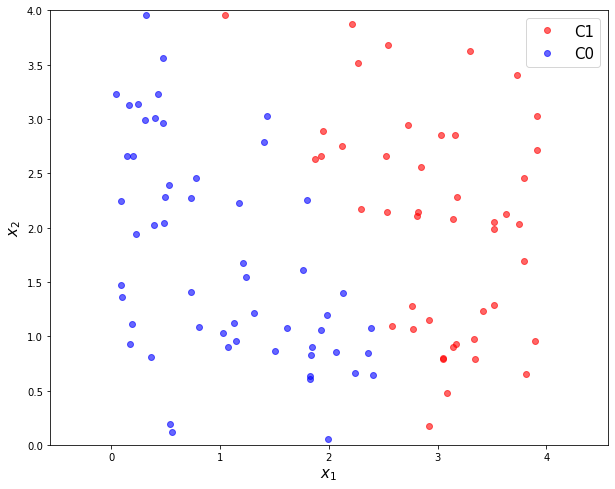

In [39]:
# data generation

m = 100
w = np.array([[-6], [2], [1]]) # bias를 포함 할 수도 있고 안할 수도 있다.
X = np.hstack([np.ones([m,1]), 4*np.random.rand(m,1), 4*np.random.rand(m,1)]) # np.ones([m,1]) bias를 포함 -> 뒤에서 안씀

w = np.asmatrix(w)
X = np.asmatrix(X)

y = 1/(1 + np.exp(-X*w)) > 0.5

C1 = np.where(y == True)[0] # np.where가 2가지를 반환함 (index, boolean) 이중에서 index만 사용
C0 = np.where(y == False)[0]

y = np.empty([m,1]) # y는 n X 1을 가진 벡터 1 또는 0
y[C1] = 1
y[C0] = 0

plt.figure(figsize=(10,8))
plt.plot(X[C1,1], X[C1,2], 'ro', alpha = 0.6, label='C1') # X중에서 첫번째(0)는 안쓰고 1과 2만 사용함
plt.plot(X[C0,1], X[C0,2], 'bo', alpha = 0.6, label='C0')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.show()

In [41]:
X = X[:,1:3] # np.ones([m,1]) 생략

X.shape

(100, 2)

In [44]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(solver='lbfgs')
#"fit data to the model"
clf.fit(X, np.ravel(y))
#clf.fit(X, y)

LogisticRegression()

In [43]:
clf?

In [51]:
#"print linear model coefficients"
clf.coef_

array([[3.17356401, 1.43533128]])

In [52]:
#"print linear model intercept"
clf.intercept_

array([-9.24135387])

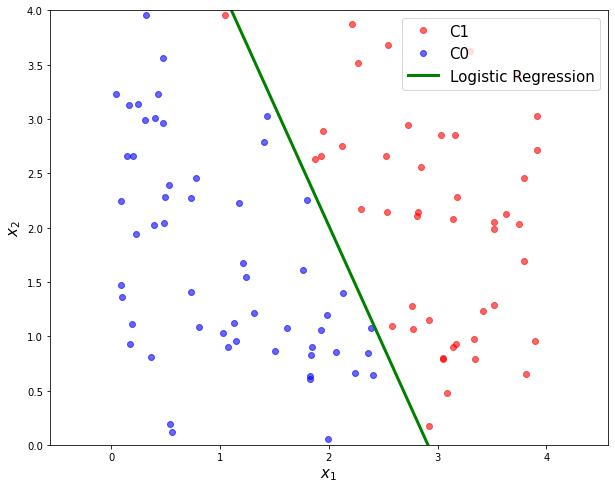

In [61]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

xp = np.linspace(0,4,100).reshape(-1,1)

# "yp" 
# w1x + w2y + w0 = 0

yp = -(w1/w2)*xp-w0/w2

# "Plot"
plt.figure(figsize=(10,8))
plt.plot(X[C1,0], X[C1,1], 'ro', alpha = 0.6, label='C1') # X중에서 첫번째(0)는 안쓰고 1과 2만 사용함
plt.plot(X[C0,0], X[C0,1], 'bo', alpha = 0.6, label='C0')
plt.plot(xp, yp, 'g', linewidth=3, label='Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 15)
plt.axis('equal')
plt.xlim([0, 4])
plt.ylim([0, 4])
plt.show()